<a href="https://colab.research.google.com/github/blancavazquez/taller-linux/blob/main/vision/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica con el modelo SVM


El objetivo de esta libreta es entrenar un modelo de máquinas de soporte vectorial (SVM) usando el conjunto de datos de Iris.

In [ ]:
#Carga bibliotecas
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

Carga de la base de datos de Iris

In [ ]:
iris = load_iris()

In [ ]:
#Listando el nombre de las 3 flores
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

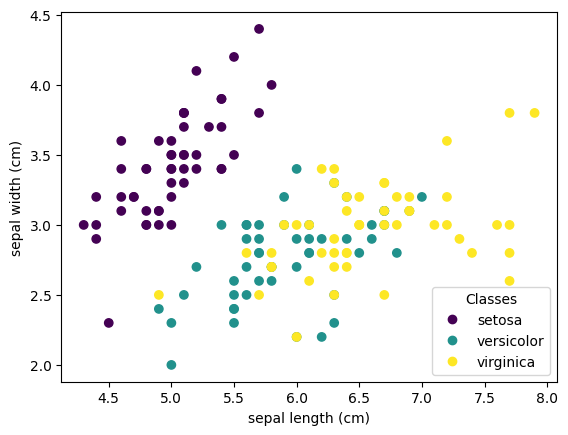

In [ ]:
#Visualizando las 3 clases
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

In [ ]:
#Visualizando el contenido del dataset iris
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
#Para facilitar el manejo de los datos, los convertimos a un dataframe
df_iris= pd.DataFrame(data=iris.data,  columns=iris.feature_names)
df_iris['especies'] = iris.target

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Análisis de datos

In [ ]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


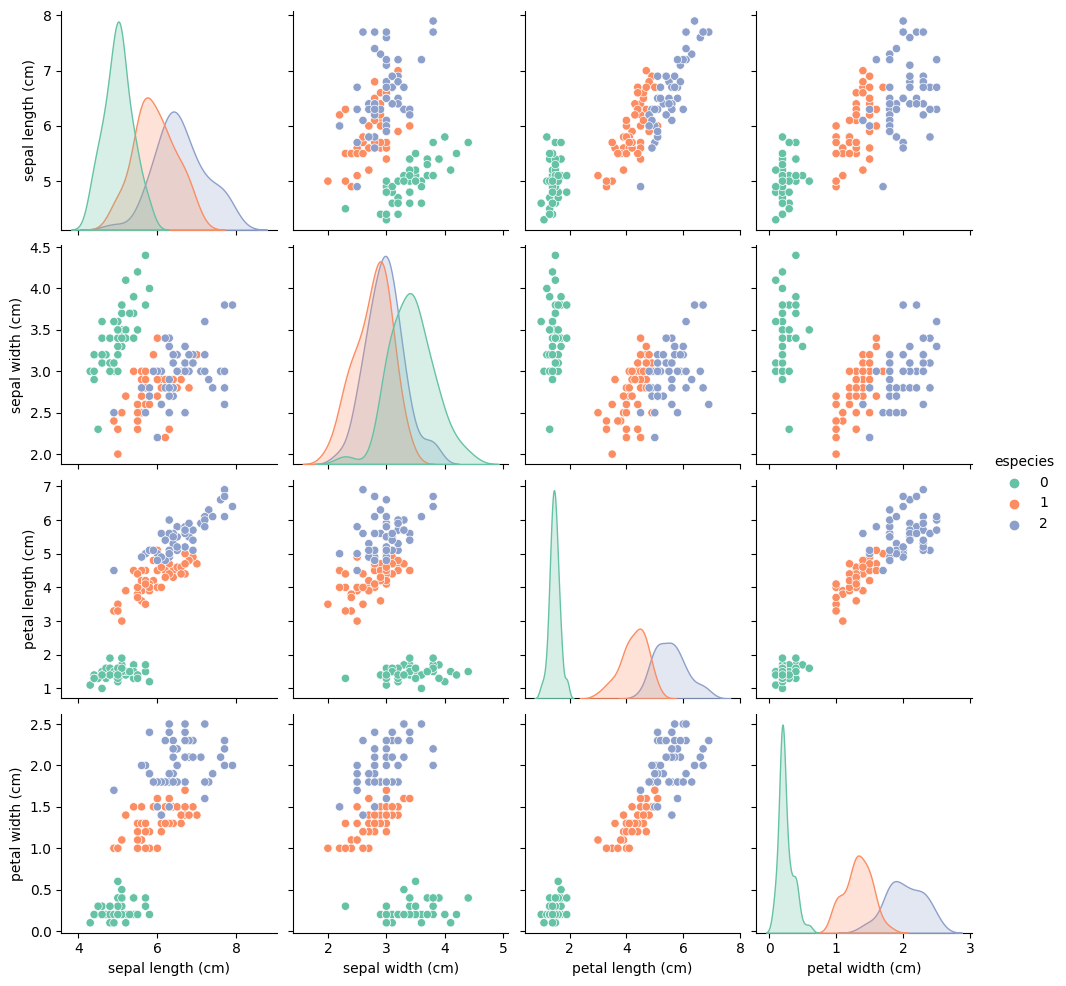

In [ ]:
# Visualizando las similitudes y diferencias entre las especies
sns.pairplot(data=df_iris, hue='especies', palette='Set2')

Text(0.5, 1.0, 'Longitud del sépalo')

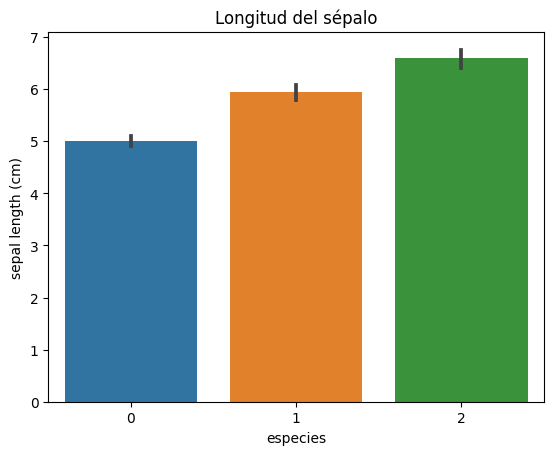

In [ ]:
sns.barplot(x="especies",y="sepal length (cm)",data=df_iris).set_title("Longitud del sépalo")

## Dividir los datos en conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

#Se separan las variables dependientes de la independiente
x=df_iris.iloc[:,:-1]
y=df_iris.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
#Analizando el tamaño de los conjuntos de datos
print("x: ", x.shape, "y: ", y.shape)
print("x_train: ",x_train.shape, "y_train: ",y_train.shape)
print("x_test: ",x_test.shape, "y_test: ", y_test.shape)

x:  (150, 4) y:  (150,)
x_train:  (105, 4) y_train:  (105,)
x_test:  (45, 4) y_test:  (45,)


## Entrenamiento el modelo

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
#Predicciones sobre el conjunto de prueba
y_pred=model.predict(x_test)

## Evaluación del modelo

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8888888888888888

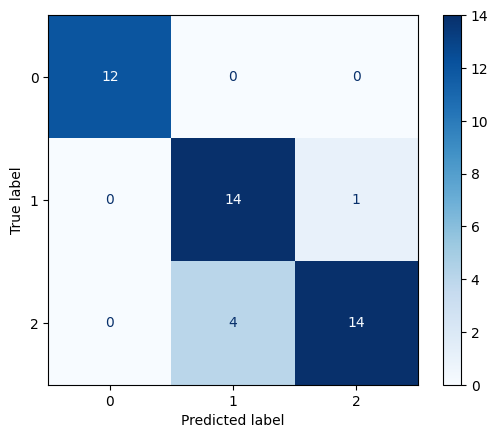

In [ ]:
#Visualizando la matriz de confusións
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.78      0.93      0.85        15
           2       0.93      0.78      0.85        18

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.90      0.89      0.89        45



## Comparando el resultado con varias SVM

In [ ]:
from sklearn import svm
import numpy as np

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
#Tomamos únicamente dos atributos
X = iris.data[:, :2]
y = iris.target

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

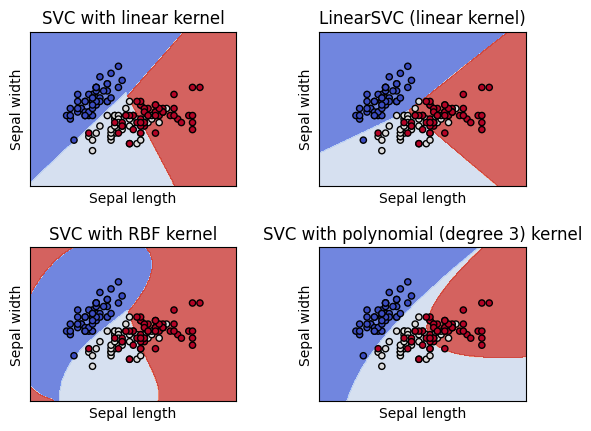

In [ ]:
# Añadimos nombre a cada gráfica
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Configuramos un grid de 2 x 2
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()